In [1]:
! pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 73.6 MB/s eta 0:00:00


In [2]:
from astroquery.jplhorizons import Horizons
import numpy as np
import plotly.graph_objects as go

# Get the ephemeris for the Sun and Mar
mars = Horizons(id='499', location='675', epochs={'start': '1601-01-01', 'stop': '1602-12-31', 'step': '1d'}) #1601-12-31
sun = Horizons(id='Sun', location='675', epochs={'start': '1601-01-01', 'stop': '1602-12-31', 'step': '1d'})

mars_epth = mars.ephemerides()
sun_epth = sun.ephemerides()

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u

mars_ang_width = mars_epth['ang_width']
sun_ang_width = sun_epth['ang_width']

mars_ra = mars_epth['RA']
mars_dec = mars_epth['DEC']

sun_ra = sun_epth['RA']
sun_dec = sun_epth['DEC']

In [4]:
m = SkyCoord(np.array(mars_ra)*u.degree, np.array(mars_dec)*u.degree, 0.00486759341* 0.00465047 / np.tan(np.radians(mars_ang_width / 3600) / 2))
m.represent_as('cartesian')
s = SkyCoord(np.array(sun_ra)*u.degree, np.array(sun_dec)*u.degree, 0.00465047 / np.tan(np.radians(sun_ang_width / 3600) / 2))
s.represent_as('cartesian')

<CartesianRepresentation (x, y, z) [dimensionless]
    [( 0.27622765, -8.64987756e-01, -3.75963703e-01),
     ( 0.29297734, -8.60368192e-01, -3.73953868e-01),
     ( 0.30963635, -8.55479938e-01, -3.71827074e-01),
     ( 0.32619892, -8.50324129e-01, -3.69584035e-01),
     ( 0.34265955, -8.44902013e-01, -3.67225302e-01),
     ( 0.35901295, -8.39215917e-01, -3.64751790e-01),
     ( 0.37525341, -8.33267400e-01, -3.62164189e-01),
     ( 0.39137613, -8.27058662e-01, -3.59463874e-01),
     ( 0.40737548, -8.20592177e-01, -3.56651388e-01),
     ( 0.4232466 , -8.13869879e-01, -3.53728065e-01),
     ( 0.43898432, -8.06894770e-01, -3.50694775e-01),
     ( 0.4545839 , -7.99668929e-01, -3.47553004e-01),
     ( 0.47004077, -7.92195315e-01, -3.44303609e-01),
     ( 0.48535036, -7.84476847e-01, -3.40947922e-01),
     ( 0.50050801, -7.76515559e-01, -3.37486761e-01),
     ( 0.5155099 , -7.68315181e-01, -3.33921961e-01),
     ( 0.53035144, -7.59877439e-01, -3.30254004e-01),
     ( 0.54502887, -7.51205727e

In [5]:
from statistics import variance

def PCA(X):
  inertia = np.dot(X.transpose(), X)
  e_values, e_vectors = np.linalg.eig(inertia)
  order = np.argsort(e_values)
  e_vectors = e_vectors[:, order].transpose()
  X_Projected=np.column_stack(([np.dot(X,e_vectors[i,:]) for i in reversed(range(len(e_values)))]))
  return X_Projected

mars_projected = PCA(np.array([m.represent_as('cartesian').x, m.represent_as('cartesian').y, m.represent_as('cartesian').z]).T)
print([variance(mars_projected[:,0]),variance(mars_projected[:,1]),variance(mars_projected[:,2])]/sum([variance(mars_projected[:,0]),variance(mars_projected[:,1]),variance(mars_projected[:,2])]))
fig = go.Figure(data=[go.Scatter(x=mars_projected[:,0], y=mars_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

sun_projected = PCA(np.array([s.represent_as('cartesian').x, s.represent_as('cartesian').y, s.represent_as('cartesian').z]).T)
print([variance(sun_projected[:,0]),variance(sun_projected[:,1]),variance(sun_projected[:,2])]/sum([variance(sun_projected[:,0]),variance(sun_projected[:,1]),variance(sun_projected[:,2])]))
fig = go.Figure(data=[go.Scatter(x=sun_projected[:,0], y=sun_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

[5.29980260e-01 4.69906608e-01 1.13132798e-04]


[4.99845655e-01 5.00154345e-01 5.68561180e-12]


In [6]:
total_projected = PCA(np.array([m.represent_as('cartesian').x, m.represent_as('cartesian').y, m.represent_as('cartesian').z,
                                s.represent_as('cartesian').x, s.represent_as('cartesian').y, s.represent_as('cartesian').z]).T)
fig = go.Figure(data=[go.Scatter(x=total_projected[:,0], y=total_projected[:,1], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

fig = go.Figure(data=[go.Scatter(x=total_projected[:,2], y=total_projected[:,3], mode='markers')], layout = go.Layout(width = 600, height = 600))
fig.show()

print([variance(total_projected[:,0]),variance(total_projected[:,1]),variance(total_projected[:,2]),variance(total_projected[:,3]),variance(total_projected[:,4]),variance(total_projected[:,5])]/
      sum([variance(total_projected[:,0]),variance(total_projected[:,1]),variance(total_projected[:,2]),variance(total_projected[:,3]),variance(total_projected[:,4]),variance(total_projected[:,5])]))


[4.47808679e-01 4.03002474e-01 7.58478356e-02 7.33410116e-02
 5.23521023e-12 2.58469896e-14]


## Install AI Feynman

In [7]:
!git clone https://github.com/zykhoo/AI-Feynman.git

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 96 (delta 14), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (96/96), 14.98 MiB | 5.07 MiB/s, done.


In [8]:
!cd /content/AI-Feynman

In [9]:
import matplotlib.pyplot as plt
!pip install matplotlib-label-lines
from labellines import labelLine, labelLines

In [10]:
!nvidia-smi

!lsb_release -a

!python3 --version

/bin/bash: nvidia-smi: command not found
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.6 LTS
Release:	20.04
Codename:	focal
Python 3.10.12


Look at what we downloaded

In [11]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

aifeynman     examples	MANIFEST.in	  README.md	    setup.cfg
example_data  LICENSE	mars_experiments  requirements.txt  setup.py


Fix broken requirements file (may not be needed if later versions fix this).

In [12]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [13]:
!pip install -r AI-Feynman/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


Check that fortran is installed

In [14]:
!gfortran --version

GNU Fortran (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [15]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.6 LTS
Release:	20.04
Codename:	focal


Install the csh shell

In [16]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 243 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 csh amd64 20110502-5 [243 kB]
Fetched 243 kB in 1s (392 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 123105 files and directories currently installed.)

Set loose permissions to avoid some reported file permissions issues

In [17]:
!chmod +777 /content/AI-Feynman/aifeynman/*

Compile the fortran code

Look at the code directory

In [18]:
!ls -l /content/AI-Feynman/aifeynman

total 1304
-rwxrwxrwx 1 root root     11 Jul 18 12:16 10ops.txt
-rwxrwxrwx 1 root root     15 Jul 18 12:16 14ops.txt
-rwxrwxrwx 1 root root     19 Jul 18 12:16 19ops.txt
-rwxrwxrwx 1 root root      8 Jul 18 12:16 7ops.txt
-rwxrwxrwx 1 root root 960508 Jul 18 12:16 arity2templates.txt
-rwxrwxrwx 1 root root   4297 Jul 18 12:16 dimensionalAnalysis.py
-rwxrwxrwx 1 root root    952 Jul 18 12:16 get_demos.py
-rwxrwxrwx 1 root root   6168 Jul 18 12:16 get_pareto.py
-rwxrwxrwx 1 root root   1745 Jul 18 12:16 getPowers.py
-rwxrwxrwx 1 root root    247 Jul 18 12:16 __init__.py
-rwxrwxrwx 1 root root    155 Jul 18 12:16 resources.py
-rwxrwxrwx 1 root root   2395 Jul 18 12:16 RPN_to_eq.py
-rwxrwxrwx 1 root root   5205 Jul 18 12:16 RPN_to_pytorch.py
-rwxrwxrwx 1 root root   5383 Jul 18 12:16 S_add_bf_on_numbers_on_pareto.py
-rwxrwxrwx 1 root root   7908 Jul 18 12:16 S_add_snap_expr_on_pareto.py
-rwxrwxrwx 1 root root    990 Jul 18 12:16 S_add_sym_on_pareto.py
-rwxrwxrwx 1 root root   1540 Jul 18 1

Compile .f files into .x files

In [19]:
import os
os.chdir("/content/AI-Feynman/") #&& ./compile.sh
!ls
!python3 /content/AI-Feynman/setup.py install


Streaming output truncated to the last 5000 lines.
aifeynman/symbolic_regress2.f90:199:1:

  199 |    if (arity.eq.0) then ! This is a nonary function
      | 1
aifeynman/symbolic_regress2.f90:200:1:

  200 |      if (op.eq."0") then
      | 1
aifeynman/symbolic_regress2.f90:202:1:

  202 |      else if (op.eq."1") then
      | 1
aifeynman/symbolic_regress2.f90:203:1:

  203 |        y = 1.
      | 1
aifeynman/symbolic_regress2.f90:204:1:

  204 |      else if (op.eq."P") then
      | 1
aifeynman/symbolic_regress2.f90:205:2:

  205 |         y = 4.*atan(1.) ! pi
      |  1
aifeynman/symbolic_regress2.f90:207:5:

  207 |            y = x(ichar(op)-96)
      |     1
aifeynman/symbolic_regress2.f90:208:1:

  208 |      end if
      | 1
aifeynman/symbolic_regress2.f90:209:1:

  209 |    else if (arity.eq.1) then ! This is a unary function
      | 1
aifeynman/symbolic_regress2.f90:210:1:

  210 |      if (op.eq.">") then
      | 1
aifeynman/symbolic_regress2.f90:212:1:

  212 |      else if

# Experiment Separate

In [20]:
import os
import pandas as pd

# os.chdir("./AI-Feynman/") #&& ./compile.sh

cart_dist = np.sqrt((s.represent_as('cartesian').x - m.represent_as('cartesian').x)**2 + (s.represent_as('cartesian').y - m.represent_as('cartesian').y)**2 + (s.represent_as('cartesian').z - m.represent_as('cartesian').z)**2)


cartesian_separate = pd.DataFrame()
cartesian_separate['mars1'] = np.array(mars_projected[:,0])
cartesian_separate['mars2'] = np.array(mars_projected[:,1])
cartesian_separate['sun1'] = np.array(sun_projected[:,0])
cartesian_separate['sun2'] = np.array(sun_projected[:,1])
cartesian_separate['distance'] = cart_dist
cartesian_separate = cartesian_separate.sample(frac=1).reset_index(drop=True)

np.savetxt('./example_data/cartesian_distance_separate.txt', cartesian_separate[[ "mars1","mars2","sun1","sun2","distance"]].sample(frac=1).values)
np.loadtxt('./example_data/cartesian_distance_separate.txt')

array([[-1.83621029, -0.13013681,  0.41525989, -0.90931603,  1.58832502],
       [-0.57229493,  0.34137811, -0.13801398,  0.98447583,  1.65634289],
       [ 1.81488707,  1.05796176,  0.98168632, -0.07933491,  1.38940352],
       ...,
       [ 1.47016125,  1.41980522,  0.91079145, -0.38350751,  1.40214587],
       [-0.97656939, -2.03634608, -0.9223414 , -0.42711077,  1.47116211],
       [-0.8683054 ,  0.67084713,  0.91051997,  0.36980155,  1.6554681 ]])

In [21]:
! rm -r ./results

rm: cannot remove './results': No such file or directory


In [22]:
from aifeynman.S_run_aifeynman import run_aifeynman
import time

start = time.time()
run_aifeynman("./example_data/","cartesian_distance_separate.txt",30,"7ops.txt", bias=[1,1,1,0,1,0,1,1,1,1,1], polyfit_deg=2, NN_epochs=400)
end = time.time()

Checking for brute force + 

./example_data/ cartesian_distance_separate.txt_train
Trying to solve mysteries with brute force...
Trying to solve ./example_data/cartesian_distance_separate.txt_train
1A added  47.110910069708176 26.2278287898153 1.519837143243+0
1A added  47.110910069708176 26.2278287898153 2.519837143243+(-(0+1))
1A added  57.61432511123182 26.217406966386548 0.359078027961+sqrt(sqrt(((x2+1)+1)))
1A added  58.86507462726179 26.192174981904664 0.427240049899+sqrt(sqrt(((x2*x2)+1)))
1A added  65.11749629303924 26.181664696696465 2.668261363663+(-sqrt(sqrt(((x3+1)+1))))
1A added  55.91132766712819 25.818113993889398 -0.002258735983+sqrt((sqrt(((x2+1)+1))+1))
1A added  55.252844926710885 25.78553785138219 0.017468373546+sqrt((sqrt(((x3+1)+1))+1))
1A added  57.417468561225824 25.749816298375364 0.234958071221+sqrt(sqrt((((x2+1)+1)+1)))
1A added  57.53154301960966 25.71862512722983 0.254290538859+sqrt(sqrt((((x3+1)+1)+1)))
1A added  58.99606224468359 25.364824545900163 0.4678

In [23]:
print(end - start)

2509.7140588760376


In [24]:
! cat /content/AI-Feynman/results/solution_cartesian_distance_separate.txt

30.599109599127313 4.9353809136708175 3602.828066979697 0.0 30.59832794974783 0
29.022539045332564 4.8589642726286435 3547.04391901891 1.0 29.019771861850135 1
26.220619637201313 4.714307216635266 3441.444268143744 3.0 26.251122643751348 1.50000000000000
26.228258900802818 4.713625043559762 3440.9462817986264 4.0 26.238712830583562 pi/2
26.20177535915065 4.708885882553241 3437.4866942638655 11.972261848733291 26.152661749385235 1.65306122448980
25.64483542835924 4.682778301511914 3418.4281601036973 12.321928094887362 25.683649337418338 acos(-0.1*x3)
25.646337793234743 4.682201794791427 3418.007310197742 51.177377557334395 25.673388098558778 acos(-0.0994685481205907*x3)
24.193629954515547 4.594382465664254 3353.8991999349055 54.87242609053939 24.15721884693738 1.221468928502+((0+1)/((((x0+1)+1)+1)+1))
24.197671746802534 4.592878069011466 3352.80099037837 109.90502196981836 24.13204159424999 0.4*x0**2 - 0.428571428571429*x0*x2 - 0.666666666666667*x0*x3 + 0.4*x1**2 - 0.7*x1*x2 + 0.4*x1*x3

Equation 3: np.arccos(x2)
Equation 7: np.log(6 - x3)
Equation 8: (x0**2 + x1**2)**0.5


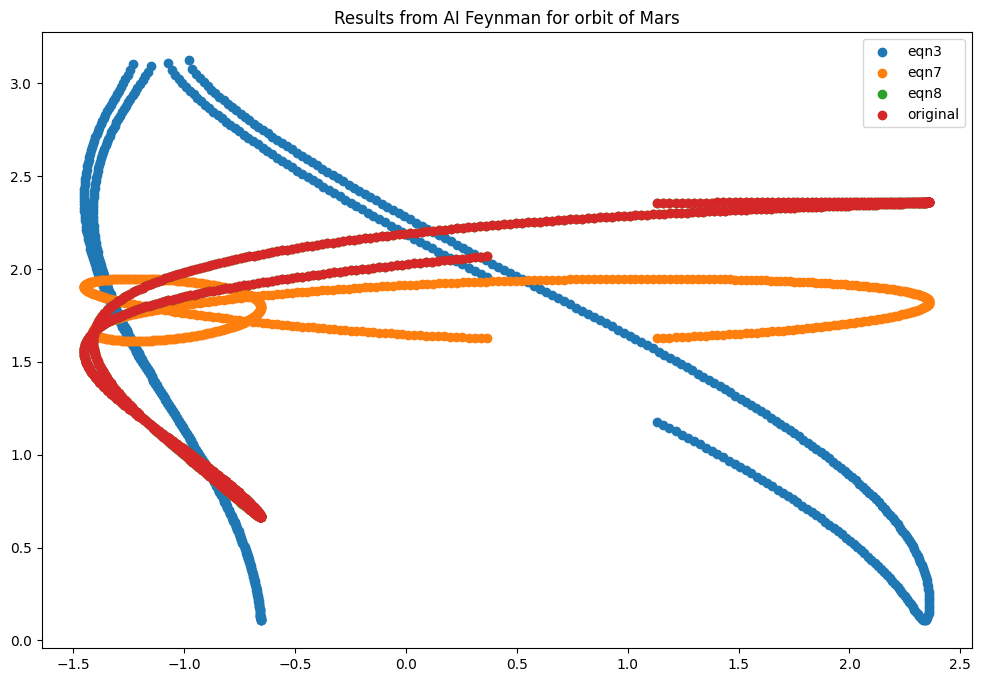

In [ ]:
from aifeynman.S_get_symbolic_expr_error import get_symbolic_expr_error
from matplotlib import pyplot as plt

plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string

with open("./results/solution_cartesian_distance_separate.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian_separate['mars1'].values")
      equation = equation.replace("x1","cartesian_separate['mars2'].values")
      equation = equation.replace("x2","cartesian_separate['sun1'].values")
      equation = equation.replace("x3","cartesian_separate['sun2'].values")

      try:
            output = list(eval(equation))
            plt.scatter(cartesian_separate['mars1'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue


plt.scatter(cartesian_separate['mars1'],cartesian_separate['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 3: np.arccos(x2)
Equation 7: np.log(6 - x3)
Equation 8: (x0**2 + x1**2)**0.5


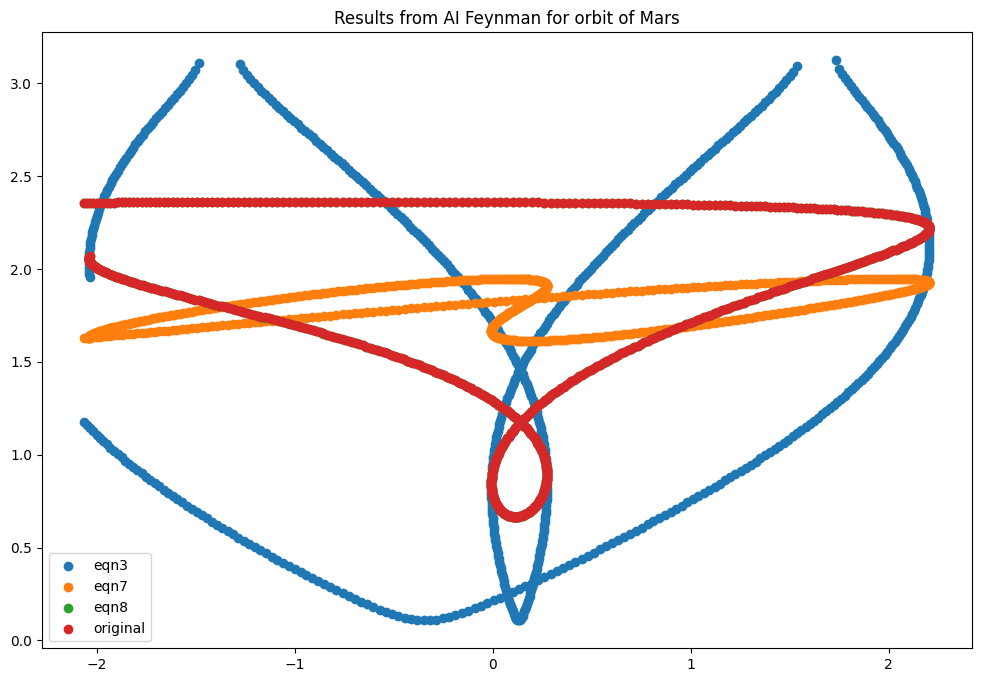

In [ ]:
plt.figure(figsize = (12,8))

with open("./results/solution_cartesian_distance_separate.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian_separate['mars1'].values")
      equation = equation.replace("x1","cartesian_separate['mars2'].values")
      equation = equation.replace("x2","cartesian_separate['sun1'].values")
      equation = equation.replace("x3","cartesian_separate['sun2'].values")

      try:
            output = list(eval(equation))
            plt.scatter(cartesian_separate['mars2'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue


plt.scatter(cartesian_separate['mars2'],cartesian_separate['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 3: np.arccos(x2)
Equation 7: np.log(6 - x3)
Equation 8: (x0**2 + x1**2)**0.5


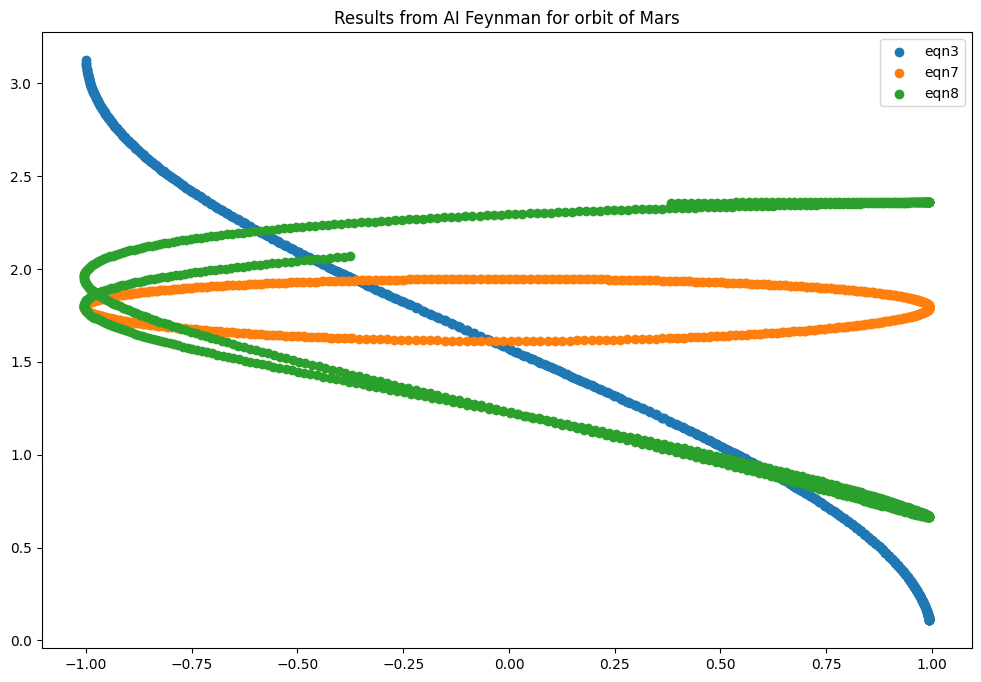

In [ ]:
plt.figure(figsize = (12,8))

with open("./results/solution_cartesian_distance_separate.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian_separate['mars1'].values")
      equation = equation.replace("x1","cartesian_separate['mars2'].values")
      equation = equation.replace("x2","cartesian_separate['sun1'].values")
      equation = equation.replace("x3","cartesian_separate['sun2'].values")

      try:
            output = list(eval(equation))
            plt.scatter(cartesian_separate['sun1'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue


plt.scatter(cartesian_separate['sun1'],cartesian_separate['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

Equation 3: np.arccos(x2)
Equation 7: np.log(6 - x3)
Equation 8: (x0**2 + x1**2)**0.5


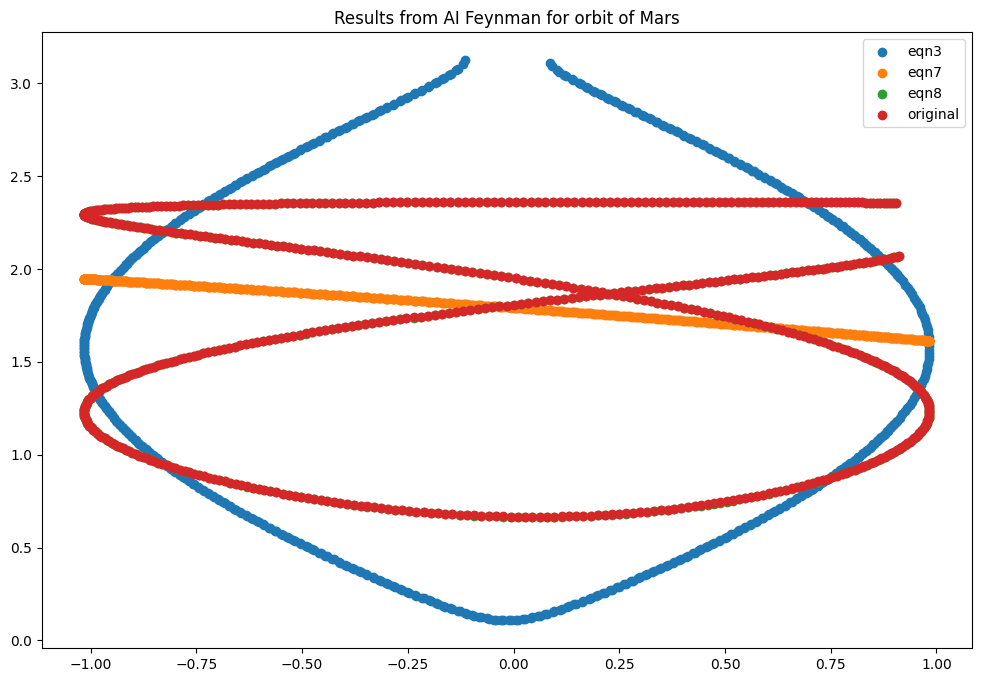

In [ ]:
plt.figure(figsize = (12,8))

with open("./results/solution_cartesian_distance_separate.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation)|("x3" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","cartesian_separate['mars1'].values")
      equation = equation.replace("x1","cartesian_separate['mars2'].values")
      equation = equation.replace("x2","cartesian_separate['sun1'].values")
      equation = equation.replace("x3","cartesian_separate['sun2'].values")

      try:
            output = list(eval(equation))
            plt.scatter(cartesian_separate['sun2'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else:
      continue


plt.scatter(cartesian_separate['sun2'],cartesian_separate['distance'], label = "original")
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()